# Ejercicio time series

In [42]:
import pandas as pd
import numpy as np
# El mantra de las visualizaciones
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')
import plotly.express as px
import plotly.graph_objects as go

In [20]:
df = pd.read_csv("train_data.csv")

In [23]:
df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [25]:
dfg = df.groupby("date").sum()

In [29]:
dfg.drop(["id","store_nbr","onpromotion"], axis=1,inplace=True)

In [75]:
dfg.head()

,sales
date,
2013-01-01,2511.618999
2013-01-02,496092.417944
2013-01-03,361461.231124
2013-01-04,354459.677093
2013-01-05,477350.121229


In [36]:
dfg.index = pd.to_datetime(dfg.index)

In [40]:
dfg.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09',
               '2017-08-10', '2017-08-11', '2017-08-12', '2017-08-13',
               '2017-08-14', '2017-08-15'],
              dtype='datetime64[ns]', name='date', length=1684, freq=None)

In [97]:
dfg.fillna(method='ffill',inplace=True)

In [92]:
dfg=dfg.asfreq('d')

In [93]:
dfg.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09',
               '2017-08-10', '2017-08-11', '2017-08-12', '2017-08-13',
               '2017-08-14', '2017-08-15'],
              dtype='datetime64[ns]', name='date', length=1688, freq='D')

In [44]:
dfg.rolling(window=30);

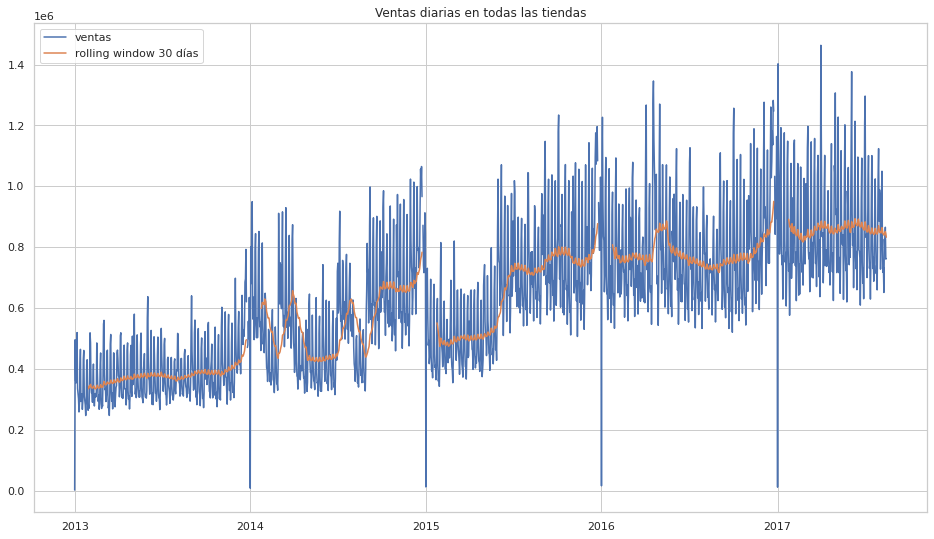

In [95]:
plt.title("Ventas diarias en todas las tiendas")
plt.plot(dfg["sales"], label="ventas")
plt.plot(dfg.rolling(window=30).mean(), label="rolling window 30 días")
plt.legend();

# vamos a intentar descomponer:

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose

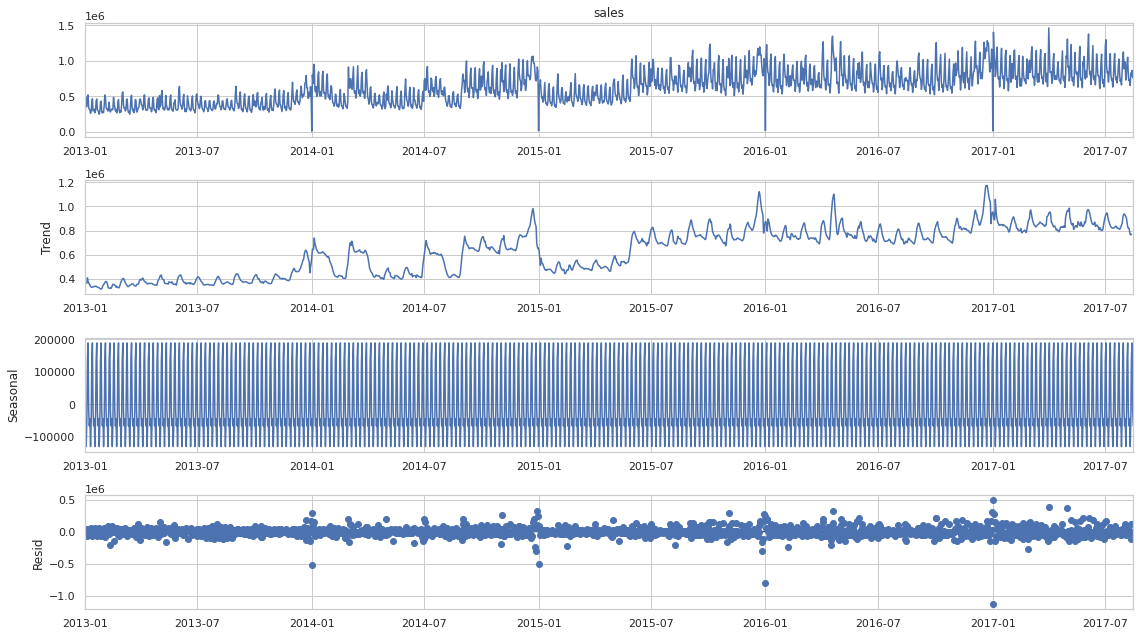

In [98]:
res = seasonal_decompose(dfg.sales, model="additive")
res.plot();

# este periodo diario es demasiado pequeño, vamos a intentar verlo por meses:

In [106]:
dfg["month"] = dfg.index.month

In [110]:
dfg["year"] = dfg.index.year

In [125]:
dfg.sample()

,sales,month,year
date,,,
2014-06-15,441279.933995,6,2014


In [119]:
dfmes = dfg.groupby(["year","month"]).sum()

In [123]:
pd.date_range("01/2013", "09/2017", freq="M")

DatetimeIndex(['2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31'],
     

In [127]:
dfmes["mo-yr"]=pd.date_range("01/2013", "09/2017", freq="M")

In [135]:
dfmes = dfmes.set_index("mo-yr")

In [136]:
dfmes.head()

,sales
mo-yr,
2013-01-31,1.032762e+07
2013-02-28,9.658960e+06
2013-03-31,1.142850e+07
2013-04-30,1.099346e+07
2013-05-31,1.159770e+07


In [140]:
dfmes.index.freq = pd.infer_freq(dfmes.index)

In [141]:
dfmes.index

DatetimeIndex(['2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31'],
     

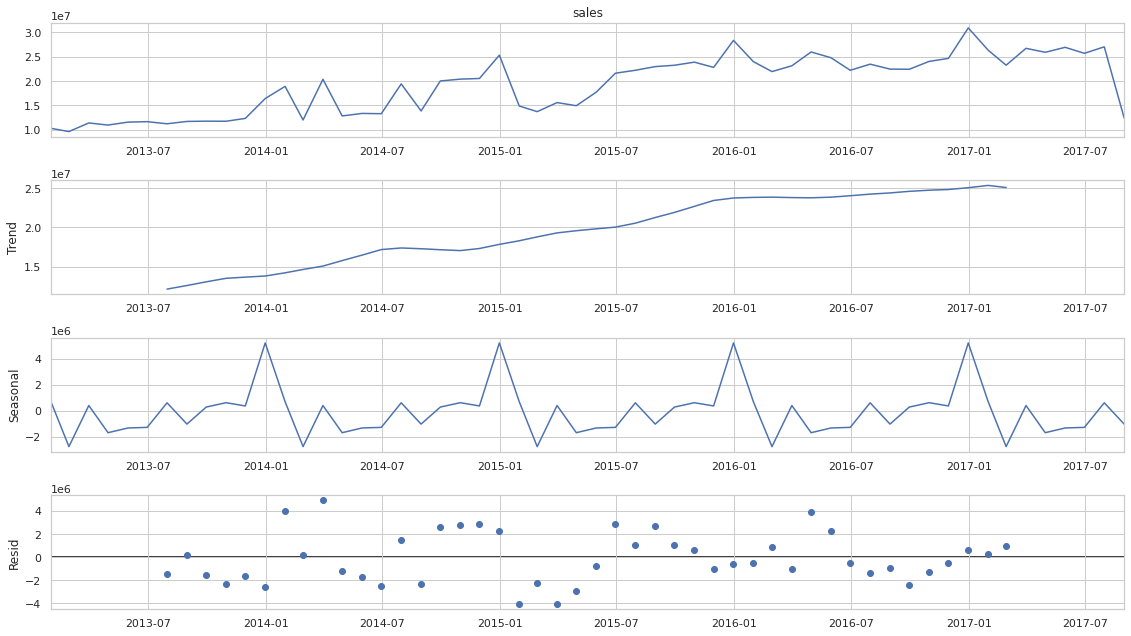

In [142]:
res = seasonal_decompose(dfmes.sales, model="additive")
res.plot();